In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#reading dataset
df=pd.read_excel("C:/Users/hi/Desktop/ds intern/project2/abc/Data.xlsx")
df.head()

,EmpID,Age,Gender,Marital Status,Department,Job role,environment satisifaction,JobInvolvement,Job Level,JobSatisfaction,...,Annual Income,Workign hrs,Working from home or office,Psycho-Social Indicators,OverTime,Attendance,Effected with corona,Percent Salary Hike,Net connectivity,Performance Rating
0,1001,33,F,Single,IT,System Engineer,5,1,1,4,...,12,12,1,2,0,1.0,1.0,11,1,6.0
1,1002,28,F,Married,IT,System Engineer,5,3,2,1,...,22,11,0,2,0,0.0,0.0,1,0,6.6
2,1003,42,Not Specified,Married,IT,System Engineer,4,3,3,5,...,24,15,1,1,1,0.0,0.0,9,1,7.6
3,1004,37,M,Divorced,IT,System Engineer,5,5,4,5,...,5,15,1,4,1,1.0,0.0,2,0,5.8
4,1005,45,F,Married,IT,System Engineer,3,5,2,4,...,23,11,0,2,1,1.0,0.0,6,0,6.9


In [3]:
#no of rows and columns
df.shape

(5044, 29)

In [4]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   EmpID                           5044 non-null   int64  
 1   Age                             5044 non-null   int64  
 2   Gender                          5024 non-null   object 
 3   Marital Status                  5044 non-null   object 
 4   Department                      5043 non-null   object 
 5   Job role                        5043 non-null   object 
 6   environment satisifaction       5044 non-null   int64  
 7   JobInvolvement                  5044 non-null   int64  
 8   Job Level                       5044 non-null   int64  
 9   JobSatisfaction                 5044 non-null   int64  
 10  RelationshipSatisfaction        5042 non-null   float64
 11  Experience                      5044 non-null   int64  
 12  TrainingTime(months)            50

In [5]:
#check for null values
df.isna().sum()

EmpID                              0
Age                                0
Gender                            20
Marital Status                     0
Department                         1
Job role                           1
environment satisifaction          0
JobInvolvement                     0
Job Level                          0
JobSatisfaction                    0
RelationshipSatisfaction           2
Experience                         0
TrainingTime(months)              19
WorkLifeBalance                   12
Behaviourial Competence            0
On time Delivery                   0
Feedbacks                          9
Ticket Solving Managements         0
Project evlaution /Completeion     0
Annual Income                      0
Workign hrs                        0
Working from home or office        0
Psycho-Social Indicators           0
OverTime                           0
Attendance                        15
Effected with corona              22
Percent Salary Hike                0
N

In [6]:
#rename the columns
df.rename(columns={'Department ':'Department','Job role':'Jobrole','environment satisifaction':'environmentsatisifaction','Behaviourial Competence':'BehaviourialCompetence','On time Delivery':'OntimeDelivery','Ticket Solving Managements ':'TicketSolvingManagements','Project evlaution /Completeion':'ProjectevlautionorCompleteion','Annual Income':'AnnualIncome','Workign hrs ':'Workinghrs','Working from home or office ':'Workingfromhomeoroffice','Psycho-Social Indicators':'PsychoSocialIndicators','Effected with corona':'Effectedwithcorona','Percent Salary Hike':'PercentSalaryHike','Net connectivity':'Netconnectivity'},inplace=True)
df.rename(columns={'Job Level':'JobLevel','Feedbacks ':'Feedbacks'},inplace=True)

In [7]:
#printing columns names
df.columns

Index(['EmpID', 'Age', 'Gender', 'Marital Status', 'Department', 'Jobrole',
       'environmentsatisifaction', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'RelationshipSatisfaction', 'Experience',
       'TrainingTime(months)', 'WorkLifeBalance', 'BehaviourialCompetence',
       'OntimeDelivery', 'Feedbacks', 'TicketSolvingManagements',
       'ProjectevlautionorCompleteion', 'AnnualIncome', 'Workinghrs',
       'Workingfromhomeoroffice', 'PsychoSocialIndicators', 'OverTime',
       'Attendance', 'Effectedwithcorona', 'PercentSalaryHike',
       'Netconnectivity', 'Performance Rating'],
      dtype='object')

In [8]:
#imputation
#categorical colunms-mode imputation
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df["Gender"] = pd.DataFrame(mode_imputer.fit_transform(df[["Gender"]]))
df["Department"] = pd.DataFrame(mode_imputer.fit_transform(df[["Department"]]))
df["Jobrole"] = pd.DataFrame(mode_imputer.fit_transform(df[["Jobrole"]]))

In [9]:
#numerical columns-median imputation
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["RelationshipSatisfaction"] = pd.DataFrame(median_imputer.fit_transform(df[["RelationshipSatisfaction"]]))
df["TrainingTime(months)"] = pd.DataFrame(median_imputer.fit_transform(df[["TrainingTime(months)"]]))
df["WorkLifeBalance"] = pd.DataFrame(median_imputer.fit_transform(df[["WorkLifeBalance"]]))
df["Feedbacks"] = pd.DataFrame(median_imputer.fit_transform(df[["Feedbacks"]]))
df["Attendance"] = pd.DataFrame(median_imputer.fit_transform(df[["Attendance"]]))
df["Effectedwithcorona"] = pd.DataFrame(median_imputer.fit_transform(df[["Effectedwithcorona"]]))

In [10]:
#checking for null values after imputation
df.isna().sum()

EmpID                            0
Age                              0
Gender                           0
Marital Status                   0
Department                       0
Jobrole                          0
environmentsatisifaction         0
JobInvolvement                   0
JobLevel                         0
JobSatisfaction                  0
RelationshipSatisfaction         0
Experience                       0
TrainingTime(months)             0
WorkLifeBalance                  0
BehaviourialCompetence           0
OntimeDelivery                   0
Feedbacks                        0
TicketSolvingManagements         0
ProjectevlautionorCompleteion    0
AnnualIncome                     0
Workinghrs                       0
Workingfromhomeoroffice          0
PsychoSocialIndicators           0
OverTime                         0
Attendance                       0
Effectedwithcorona               0
PercentSalaryHike                0
Netconnectivity                  0
Performance Rating  

In [11]:
#check for duplicate rows
df.duplicated().sum()

0

In [12]:
#basic statistics
df.describe()

,EmpID,Age,environmentsatisifaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,Experience,TrainingTime(months),WorkLifeBalance,...,AnnualIncome,Workinghrs,Workingfromhomeoroffice,PsychoSocialIndicators,OverTime,Attendance,Effectedwithcorona,PercentSalaryHike,Netconnectivity,Performance Rating
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,...,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000
mean,3522.500000,35.855274,2.979580,3.022998,3.016852,3.009516,2.991475,13.295004,3.498414,3.032910,...,14.939334,11.969270,0.493259,3.009913,0.505749,0.489889,0.507732,8.601705,0.499405,6.270341
std,1456.221709,8.372409,1.411188,1.408406,1.412078,1.415303,1.408498,7.168063,1.689277,1.412146,...,5.986558,2.006644,0.500004,1.423403,0.500017,0.499947,0.499990,4.655936,0.500049,0.811740
min,1001.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.600000
25%,2261.750000,29.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,2.000000,2.000000,...,10.000000,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,0.000000,5.700000
50%,3522.500000,36.000000,3.000000,3.000000,3.000000,3.000000,3.000000,13.000000,4.000000,3.000000,...,15.000000,12.000000,0.000000,3.000000,1.000000,0.000000,1.000000,9.000000,0.000000,6.300000
75%,4783.250000,43.000000,4.000000,4.000000,4.000000,4.000000,4.000000,20.000000,5.000000,4.000000,...,20.000000,14.000000,1.000000,4.000000,1.000000,1.000000,1.000000,13.000000,1.000000,6.800000
max,6044.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,25.000000,6.000000,5.000000,...,25.000000,15.000000,1.000000,5.000000,1.000000,1.000000,1.000000,16.000000,1.000000,8.900000


In [13]:
#no of unique values in a column
df.nunique()

EmpID                            5044
Age                                29
Gender                              3
Marital Status                      3
Department                         18
Jobrole                            46
environmentsatisifaction            5
JobInvolvement                      5
JobLevel                            5
JobSatisfaction                     5
RelationshipSatisfaction            5
Experience                         25
TrainingTime(months)                6
WorkLifeBalance                     5
BehaviourialCompetence              5
OntimeDelivery                      5
Feedbacks                           5
TicketSolvingManagements            5
ProjectevlautionorCompleteion      14
AnnualIncome                       21
Workinghrs                          7
Workingfromhomeoroffice             2
PsychoSocialIndicators              5
OverTime                            2
Attendance                          2
Effectedwithcorona                  2
PercentSalar

In [14]:
#segregating the category and numerical columns for visualization
categorical = df.dtypes[df.dtypes == object].index
num = list(set(df.columns) - set(categorical))
len(num)

25

<AxesSubplot:>

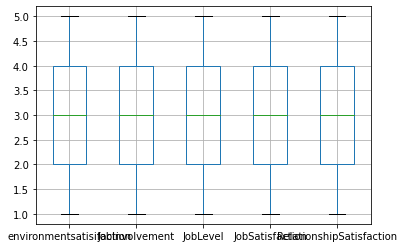

In [15]:
#boxplot to check outliers
df.boxplot(column=['environmentsatisifaction','JobInvolvement','JobLevel','JobSatisfaction','RelationshipSatisfaction'])

<AxesSubplot:>

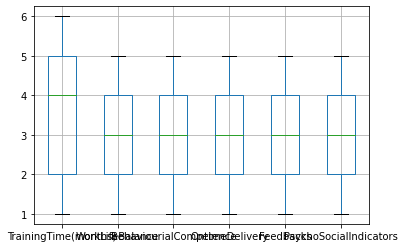

In [16]:
#boxplot to check for outliers
df.boxplot(column=['TrainingTime(months)', 'WorkLifeBalance','BehaviourialCompetence',
       'OntimeDelivery', 'Feedbacks','PsychoSocialIndicators',])

<AxesSubplot:>

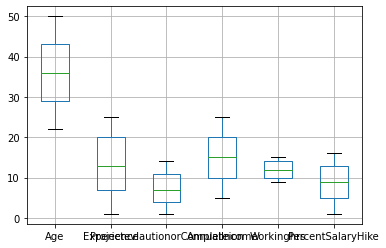

In [17]:
#boxplot check for outliers
df.boxplot(column=['Age','Experience',
       'ProjectevlautionorCompleteion', 'AnnualIncome', 'Workinghrs','PercentSalaryHike'])

<AxesSubplot:>

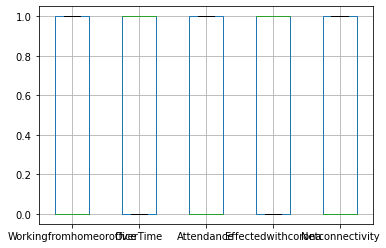

In [18]:
#boxplot for outliers
df.boxplot(column=['Workingfromhomeoroffice', 'OverTime','Attendance', 'Effectedwithcorona','Netconnectivity'])

<AxesSubplot:>

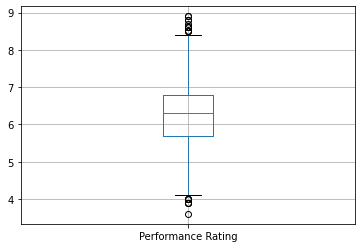

In [19]:
#boxplot to check outliers
df.boxplot(['Performance Rating'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Performance Rating'>

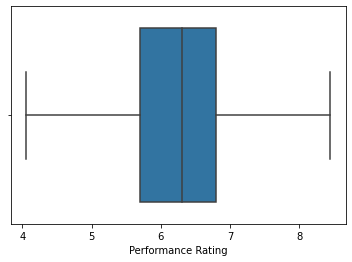

In [20]:
#remove winsorization
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Performance Rating'])

df['Performance Rating'] = winsor.fit_transform(df[['Performance Rating']])

# we can inspect the minimum caps and maximum caps 
# winsor.left_tail_caps_, winsor.right_tail_caps_

# lets see boxplot
sns.boxplot(df['Performance Rating'])

array([[<AxesSubplot:title={'center':'EmpID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'environmentsatisifaction'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'TrainingTime(months)'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>],
       [<AxesSubplot:title={'center':'BehaviourialCompetence'}>,
        <AxesSubplot:title={'center':'OntimeDelivery'}>,
        <AxesSubplot:title={'center':'Feedbacks'}>,
        <AxesSubplot:title={'center':'TicketSolvingManagements'}>,
        <AxesSubplot:title={'center':'ProjectevlautionorCompleteion'}>],
       [<AxesSubplot:title={'center':'AnnualIncome'}>,
        <AxesSubplot:title={'center':'Workinghrs'}>,
        

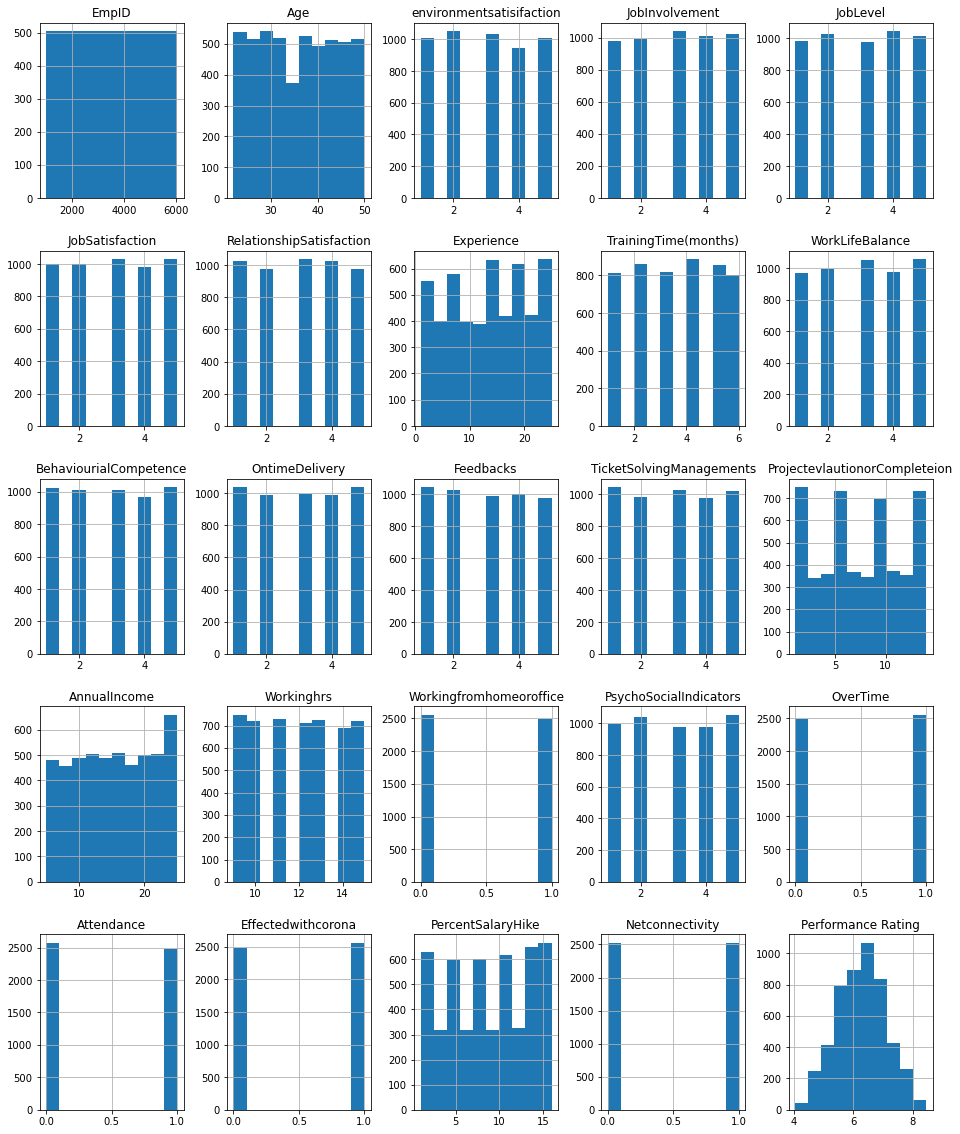

In [21]:
#histograms of all the columns to see whether data is normally distributed or not
df.hist(figsize=(16, 20))

In [22]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
df.groupby(by='Department')['Performance Rating'].mean()

Department
 Analyst                6.151852
 Cloud computing        6.293182
 Designer               6.260517
Admin Offices           6.491667
Analyst                 6.209769
DevOps Engineer         6.275120
Developer               6.302398
Engineer                6.340331
Executive Office        6.227273
IT                      6.290741
IT/IS                   6.266413
Java Developer          6.247656
Programmer              6.439205
Scientist               6.262369
Software Developer      6.246479
Software Engineering    6.284889
Specialist              6.367308
web developer           6.192405
Name: Performance Rating, dtype: float64

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Department', ylabel='Performance Rating'>

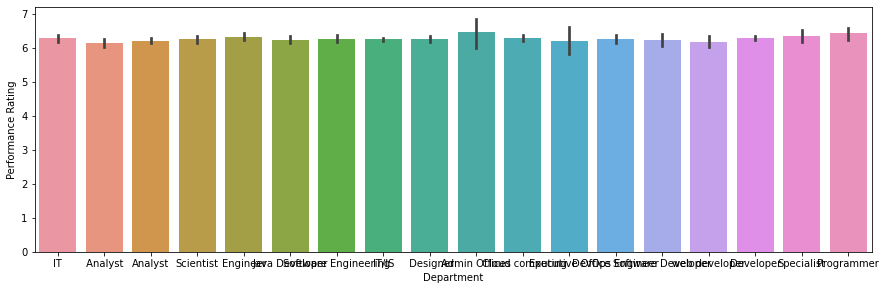

In [23]:
#performance according to department
plt.figure(figsize=(15,4.5))
sns.barplot(df['Department'],df['Performance Rating'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='Performance Rating'>

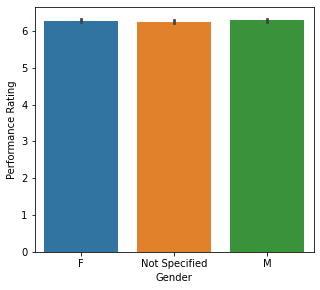

In [24]:
#performance according to experience
df.groupby(by='Gender')['Performance Rating'].mean()
plt.figure(figsize=(5,4.5))
sns.barplot(df['Gender'],df['Performance Rating'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='environmentsatisifaction', ylabel='Performance Rating'>

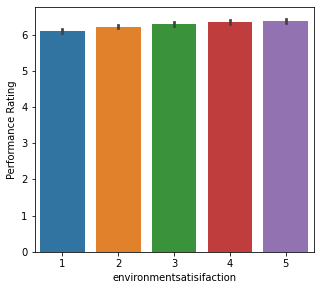

In [25]:
#performance according to experience
df.groupby(by='environmentsatisifaction')['Performance Rating'].mean()
plt.figure(figsize=(5,4.5))
sns.barplot(df['environmentsatisifaction'],df['Performance Rating'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Experience', ylabel='Performance Rating'>

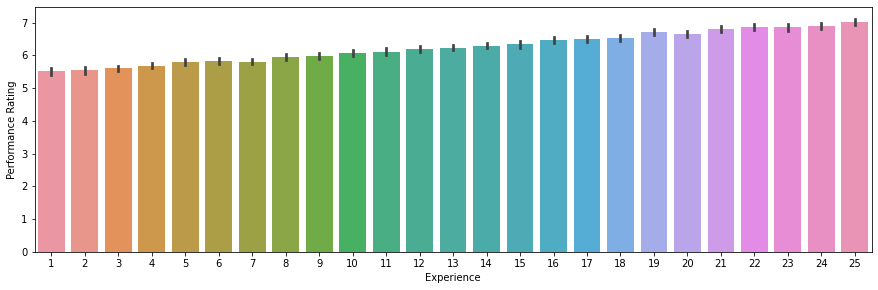

In [26]:
#performance according to experience
plt.figure(figsize=(15,4.5))
sns.barplot(df['Experience'],df['Performance Rating'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverTime', ylabel='Performance Rating'>

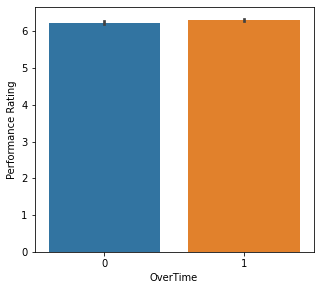

In [27]:
#performance according to experience
df.groupby(by='OverTime')['Performance Rating'].mean()
plt.figure(figsize=(5,4.5))
sns.barplot(df['OverTime'],df['Performance Rating'])

C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Workingfromhomeoroffice', ylabel='Performance Rating'>

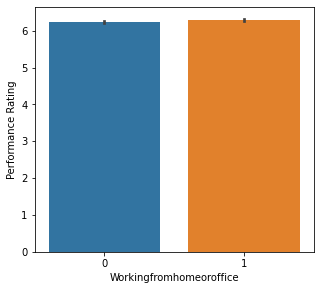

In [29]:
#performance according to Workingfromhomeoroffice
plt.figure(figsize=(5,4.5))
sns.barplot(df['Workingfromhomeoroffice'],df['Performance Rating'])

In [30]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5):
    df.iloc[:,i] = enc.fit_transform(df.iloc[:,i])
df.head()

,EmpID,Age,Gender,Marital Status,Department,Jobrole,environmentsatisifaction,JobInvolvement,JobLevel,JobSatisfaction,...,AnnualIncome,Workinghrs,Workingfromhomeoroffice,PsychoSocialIndicators,OverTime,Attendance,Effectedwithcorona,PercentSalaryHike,Netconnectivity,Performance Rating
0,1001,33,0,2,9,43,5,1,1,4,...,12,12,1,2,0,1.0,1.0,11,1,6.0
1,1002,28,0,1,9,43,5,3,2,1,...,22,11,0,2,0,0.0,0.0,1,0,6.6
2,1003,42,2,1,9,43,4,3,3,5,...,24,15,1,1,1,0.0,0.0,9,1,7.6
3,1004,37,1,0,9,43,5,5,4,5,...,5,15,1,4,1,1.0,0.0,2,0,5.8
4,1005,45,0,1,9,43,3,5,2,4,...,23,11,0,2,1,1.0,0.0,6,0,6.9


In [31]:
# Finding out the correlation coeffecient to find out which predictors are significant.
df.corr()

,EmpID,Age,Gender,Marital Status,Department,Jobrole,environmentsatisifaction,JobInvolvement,JobLevel,JobSatisfaction,...,AnnualIncome,Workinghrs,Workingfromhomeoroffice,PsychoSocialIndicators,OverTime,Attendance,Effectedwithcorona,PercentSalaryHike,Netconnectivity,Performance Rating
EmpID,1.000000,-0.012075,0.001008,-0.001499,0.010496,-0.018826,-0.012436,-0.005469,0.019809,0.001935,...,-0.011138,-0.018584,-0.018699,0.006870,0.015503,0.010224,-0.011729,-0.001151,0.006069,0.000937
Age,-0.012075,1.000000,-0.004876,-0.009054,-0.008982,0.016186,0.005523,-0.015525,0.028770,0.023076,...,0.007971,0.015209,-0.001133,0.024630,-0.010554,0.011494,-0.012428,0.012062,-0.001063,0.008898
Gender,0.001008,-0.004876,1.000000,-0.011825,0.010974,-0.003231,-0.008584,0.008780,-0.010664,0.014804,...,-0.008358,0.001004,0.005702,-0.014148,0.021201,0.028742,-0.004251,0.002118,-0.006253,-0.009498
Marital Status,-0.001499,-0.009054,-0.011825,1.000000,0.010429,-0.015064,0.007826,-0.004725,-0.017499,0.015166,...,0.012020,0.005639,-0.018279,0.021770,0.006074,0.011533,-0.018846,-0.010365,-0.010497,0.002543
Department,0.010496,-0.008982,0.010974,0.010429,1.000000,-0.087146,0.014029,-0.004262,-0.007609,-0.011100,...,0.015091,-0.008604,-0.019438,-0.007165,0.018521,-0.009210,-0.001145,0.006511,0.017195,0.015085
Jobrole,-0.018826,0.016186,-0.003231,-0.015064,-0.087146,1.000000,-0.002904,-0.006137,-0.007888,-0.010700,...,0.004178,-0.000982,-0.002516,0.014582,-0.003503,0.000457,-0.008758,0.003419,0.009296,0.013489
environmentsatisifaction,-0.012436,0.005523,-0.008584,0.007826,0.014029,-0.002904,1.000000,-0.019618,-0.015052,0.009331,...,-0.004865,0.022607,0.020742,0.015303,0.000307,0.028516,0.020037,-0.012224,0.012768,0.119136
JobInvolvement,-0.005469,-0.015525,0.008780,-0.004725,-0.004262,-0.006137,-0.019618,1.000000,-0.014154,0.012922,...,-0.004891,-0.002486,-0.020054,0.010272,0.005725,-0.006147,0.002282,-0.002988,-0.009835,0.108209
JobLevel,0.019809,0.028770,-0.010664,-0.017499,-0.007609,-0.007888,-0.015052,-0.014154,1.000000,0.022344,...,0.016752,-0.011714,0.021365,-0.001958,0.008429,-0.008606,0.010348,0.017127,-0.029613,0.118208
JobSatisfaction,0.001935,0.023076,0.014804,0.015166,-0.011100,-0.010700,0.009331,0.012922,0.022344,1.000000,...,0.000466,0.008831,-0.017563,-0.001917,0.019817,0.021995,0.000176,-0.006316,0.000288,0.127741


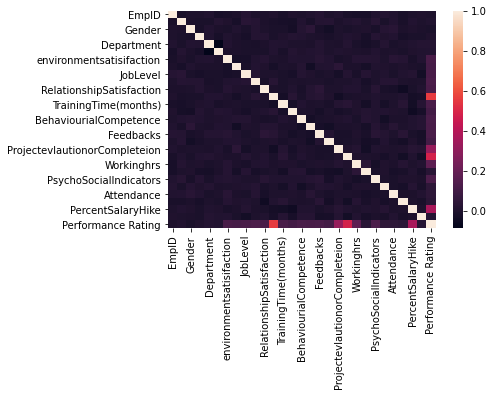

In [32]:
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr())
  
# displaying heatmap
plt.show()

<AxesSubplot:>

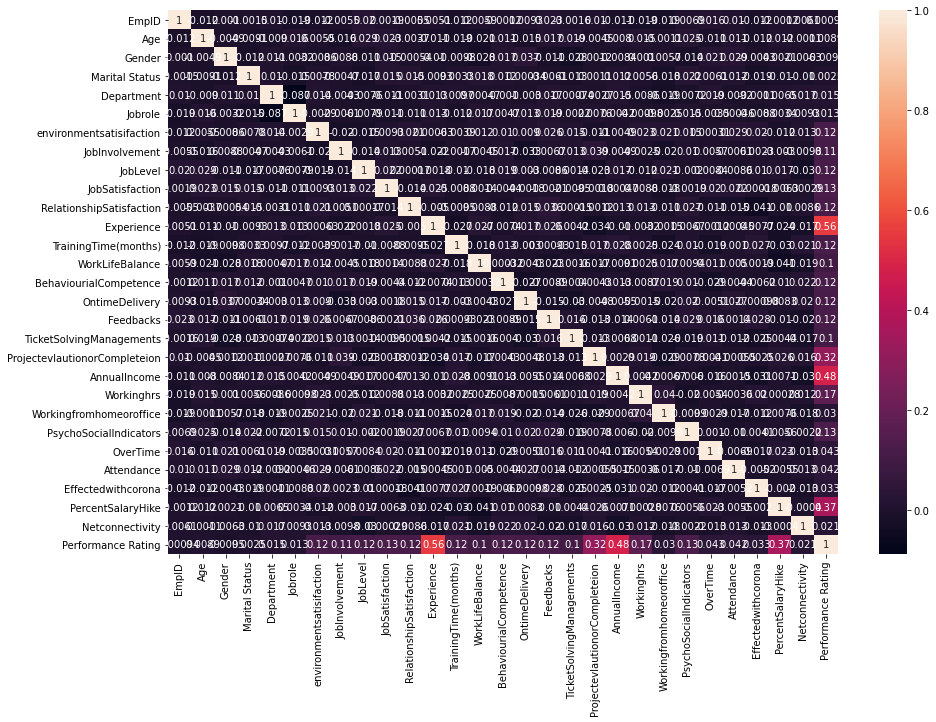

In [33]:
#heatmap 
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [34]:
# Here we have selected only the important columns
y = df['Performance Rating']
X = df.iloc[:,[6,7,9,11,13,14,15,16,17,18,19,20,22,26]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,environmentsatisifaction,JobInvolvement,JobSatisfaction,Experience,WorkLifeBalance,BehaviourialCompetence,OntimeDelivery,Feedbacks,TicketSolvingManagements,ProjectevlautionorCompleteion,AnnualIncome,Workinghrs,PsychoSocialIndicators,PercentSalaryHike
0,5,1,4,12,1.0,5,1,3.0,3,12,12,12,2,11
1,5,3,1,19,4.0,1,1,4.0,5,12,22,11,2,1
2,4,3,5,23,3.0,2,3,3.0,4,8,24,15,1,9
3,5,5,5,7,4.0,1,5,4.0,3,12,5,15,4,2
4,3,5,4,22,2.0,4,4,1.0,1,11,23,11,2,6


In [35]:
y.head()

0    6.0
1    6.6
2    7.6
3    5.8
4    6.9
Name: Performance Rating, dtype: float64

In [36]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [37]:
#linear regression
from sklearn.linear_model import LinearRegression

In [38]:
#fitting with train data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
#score on train data
regressor.score(X_train, y_train)

0.9461999378556156

In [40]:
#training error
from sklearn import metrics
y_pred1 = regressor.predict(X_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred1)))

Root Mean Squared Error: 0.18777820472872447


In [41]:
#prediction on test data
y_pred = regressor.predict(X_test)

In [42]:
#testing error
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1474540547469352
Mean Squared Error: 0.033374411009218743
Root Mean Squared Error: 0.18268664704684562


In [43]:
from sklearn.metrics import r2_score
print('r2:',r2_score(y_test, y_pred))

r2: 0.9490145182495103


In [44]:
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog=y, exog=X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Performance Rating   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.452e+05
Date:                Wed, 25 May 2022   Prob (F-statistic):                        0.00
Time:                        13:16:04   Log-Likelihood:                          864.93
No. Observations:                5044   AIC:                                     -1702.
Df Residuals:                    5030   BIC:                                     -1610.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
environmentsatisifaction          0.0783      0.002     39.132      0.000       0.074       0.082
JobInvolvement                    0.0774      0.002     38.825      0.000       0.074       0.081
JobSatisfaction                   0.0778      0.002     39.171      0.000       0.074       0.082
Experience                        0.0671      0.000    170.078      0.000       0.066       0.068
WorkLifeBalance                   0.0771      0.002     38.870      0.000       0.073       0.081
BehaviourialCompetence            0.0799      0.002     40.486      0.000       0.076       0.084
OntimeDelivery                    0.0807      0.002     41.128      0.000       0.077       0.085
Feedbacks                         0.0804      0.002     40.472      0.000       0.076       0.084
TicketSolvingManagements          0.0759      0.002     38.494      0.000       0.072       0.080
ProjectevlautionorCompleteion     0.0689      0.001     98.719      0.000       0.067       0.070
AnnualIncome                      0.0697      0.000    150.360      0.000       0.069       0.071
Workinghrs                        0.0922      0.001     81.395      0.000       0.090       0.094
PsychoSocialIndicators            0.0797      0.002     40.338      0.000       0.076       0.084
PercentSalaryHike                 0.0684      0.001    112.910      0.000       0.067       0.070
==============================================================================
Omnibus:                        6.382   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.756
Skew:                          -0.032   Prob(JB):                       0.0562
Kurtosis:                       2.848   Cond. No.                         20.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#checking the model
features=np.array([[5,1,4,12,1.0,5,1,3.0,3,12,12,12,2,11]])
regressor.predict(features)

array([6.32576406])

In [46]:
# import the decision tree regressor
from sklearn.tree import DecisionTreeRegressor 

In [47]:
# create a regressor object
regressor1 = DecisionTreeRegressor(random_state = 0) 
regressor1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [48]:
#prediction
y_pred2 = regressor1.predict(X_test)

In [49]:
#test error
import numpy as np
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 0.39943857331571997
Mean Squared Error: 0.25624339498018495
Root Mean Squared Error: 0.5062048942673164


In [50]:
#train error,model score on train data,r2 score on test data
y_pred3 = regressor1.predict(X_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred3)))
print(regressor1.score(X_train, y_train))
from sklearn.metrics import r2_score
print('r2:',r2_score(y_test, y_pred2))

Root Mean Squared Error: 1.2144645207187452e-16
1.0
r2: 0.6085416178629494


In [51]:
#checking the model
features=np.array([[5,1,4,12,1.0,5,1,3.0,3,12,12,12,2,11]])
regressor1.predict(features)

array([6.])

In [52]:
#ANN
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanAbsoluteError

In [53]:
#fitting the model
learning_rate = 0.01 
model = Sequential([
    Dense(311, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(200, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(100, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
])
# loss function
msle = MeanAbsoluteError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
model.fit(
    X_train, y_train,
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
45/45 [==============================] - 4s 14ms/step - loss: 1.8787 - mean_absolute_error: 1.8560 - val_loss: 0.3762 - val_mean_absolute_error: 0.3536
Epoch 2/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6812 - mean_absolute_error: 0.6778 - val_loss: 0.3303 - val_mean_absolute_error: 0.3487
Epoch 3/10
45/45 [==============================] - 0s 6ms/step - loss: 0.6293 - mean_absolute_error: 0.6304 - val_loss: 0.3543 - val_mean_absolute_error: 0.3924
Epoch 4/10
45/45 [==============================] - 0s 5ms/step - loss: 0.5863 - mean_absolute_error: 0.5839 - val_loss: 0.1798 - val_mean_absolute_error: 0.1820
Epoch 5/10
45/45 [==============================] - 0s 6ms/step - loss: 0.5481 - mean_absolute_error: 0.5440 - val_loss: 0.2917 - val_mean_absolute_error: 0.3094
Epoch 6/10
45/45 [==============================] - 0s 6ms/step - loss: 0.5749 - mean_absolute_error: 0.5709 - val_loss: 0.5368 - val_mean_absolute_error: 0.5183
Epoch 7/10
45/45 [=========

In [54]:
y_pred4 = model.predict(X_test)

In [55]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

Root Mean Squared Error: 0.32360079689699733


In [56]:
y_pred5 = model.predict(X_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred5)))
from sklearn.metrics import r2_score
print('r2:',r2_score(y_test, y_pred))

Root Mean Squared Error: 0.33299923564235967
r2: 0.9490145182495103


In [57]:
#checking the model
features=np.array([[5,1,4,12,1.0,5,1,3.0,3,12,12,12,2,11]])
model.predict(features)

array([[6.1052403]], dtype=float32)

In [58]:
#xgboost
import xgboost as xg

In [59]:
# Instantiation
model1 = xg.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 100)
  
# Fitting the model
model1.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
# Predict the model
y_pred6 = model1.predict(X_test)

In [61]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred6)))

Root Mean Squared Error: 0.2650701811789028


In [62]:
y_pred7 = model.predict(X_train)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred7)))
print(model1.score(X_train, y_train))
from sklearn.metrics import r2_score
print('r2:',r2_score(y_test, y_pred))

Root Mean Squared Error: 0.33299923564235967
0.912558652668029
r2: 0.9490145182495103


In [63]:
features=np.array([[5,1,4,12,1.0,5,1,3.0,3,12,12,12,2,11]])
model.predict(features)

array([[6.1052403]], dtype=float32)

In [65]:
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))

0.912558652668029
0.8926617112941118
